In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds=pd.read_csv(r'C:\Users\narra\OneDrive\Desktop\projects\Data Science\Fraud Detection\Fraud.csv')

# Cleaning dataset

Handling missing values

In [3]:
ds.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
ds.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
ds.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No null values

In [7]:
ds.value_counts('isFraud')

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
ds.value_counts('isFlaggedFraud')

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

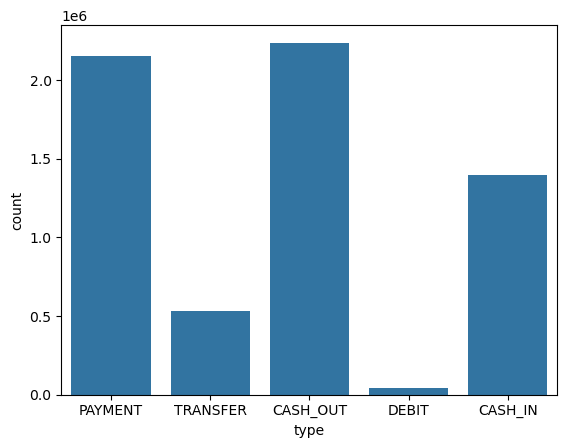

In [9]:
sns.countplot(x='type', data=ds)

<Axes: xlabel='type'>

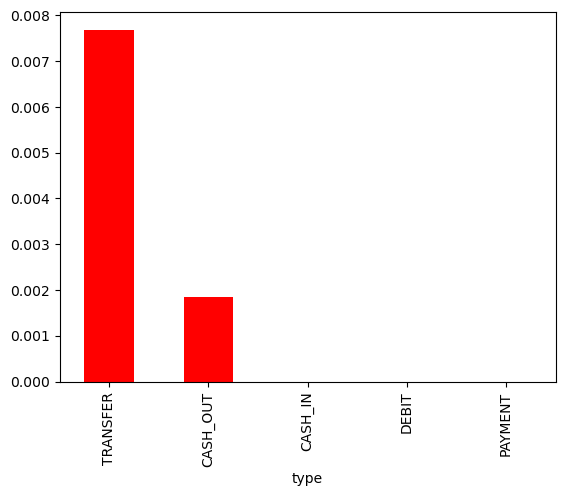

In [10]:
fraud_by_type=ds.groupby(['type'])['isFraud'].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar', color='red')

In [11]:
ds['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

<Axes: xlabel='amount', ylabel='Count'>

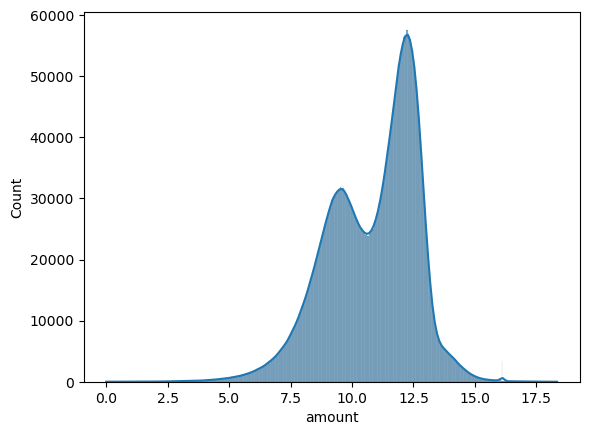

In [12]:
sns.histplot(np.log1p(ds['amount']), kde=True)

<Axes: xlabel='isFraud', ylabel='amount'>

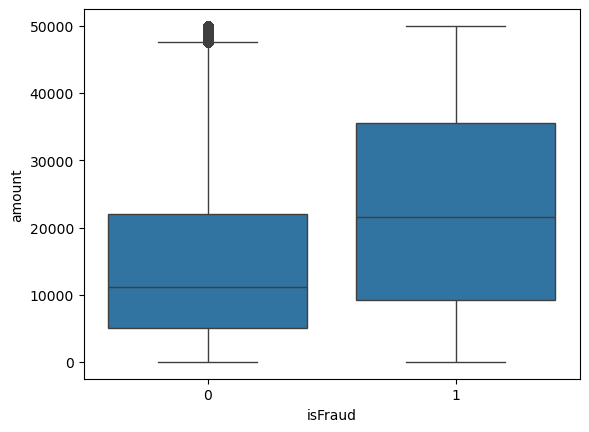

In [13]:
sns.boxplot(data=ds[ds['amount']<50000], x='isFraud', y='amount')

In [14]:
ds['balancedifforg']=ds['oldbalanceOrg']-ds['newbalanceOrig']
ds['balancediffdest']=ds['newbalanceDest']-ds['oldbalanceDest']

In [15]:
(ds['balancedifforg']<0).sum()

1399253

In [16]:
ds.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balancedifforg,balancediffdest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


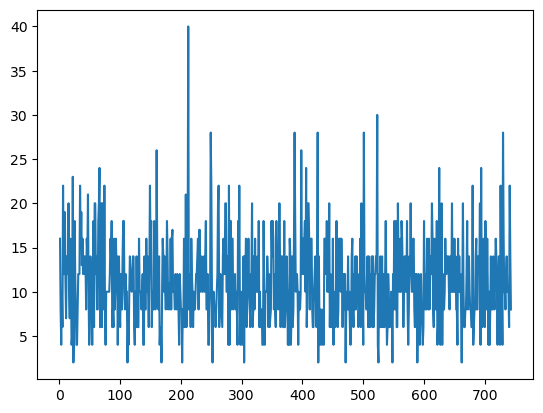

In [17]:
frauds_per_step=ds[ds['isFraud']==1]['step'].value_counts().sort_index()
plt.plot(frauds_per_step.index,frauds_per_step.values)

In [18]:
ds.drop(columns='step', inplace=True)

In [19]:
ds.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balancedifforg,balancediffdest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [20]:
top_senders=ds['nameOrig'].value_counts().head(10)

In [21]:
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [22]:
top_receivers=ds['nameDest'].value_counts().head(10)

In [23]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [24]:
fraud_users=ds[ds['isFraud']==1]['nameOrig'].value_counts().head(10)

In [25]:
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [26]:
fraud_types=ds[ds['type'].isin (['TRANSFER', 'CASH_OUT'])]

In [27]:
fraud_types['type'].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

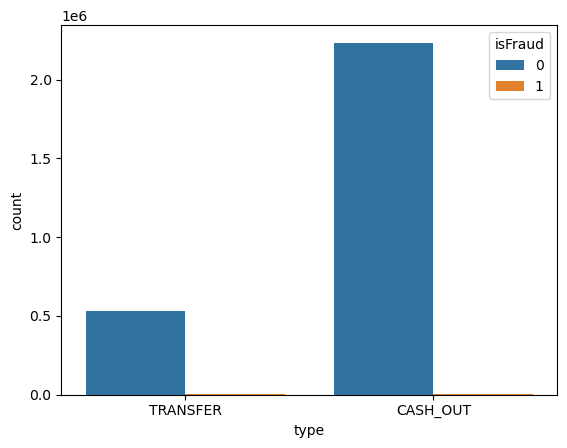

In [28]:
sns.countplot(data=fraud_types, x='type', hue='isFraud')

In [29]:
corr=ds[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']].corr()

In [30]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


<Axes: >

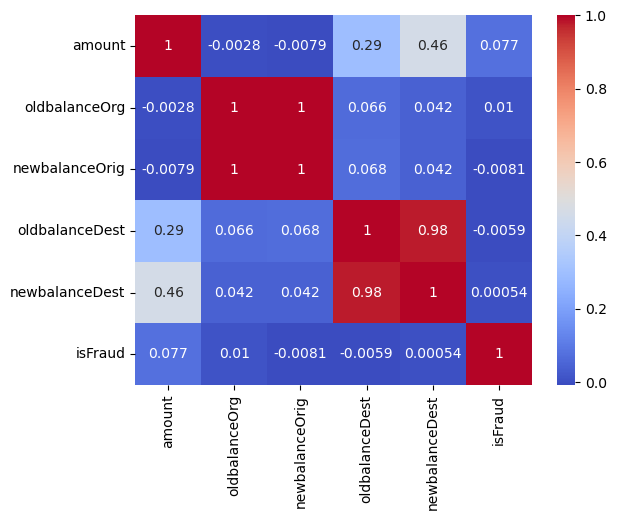

In [31]:
sns.heatmap(data=corr, annot=True, cmap='coolwarm')

In [32]:
zero_after_transfer=ds[(ds['oldbalanceOrg']> 0) & (ds['newbalanceOrig']==0) & (ds['type'].isin(['TRANSFER','CASH_OUT']))]

In [33]:
len(zero_after_transfer)

1188074

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [35]:
ds_model=ds.drop(columns=['nameOrig','nameDest','isFlaggedFraud'],axis=1)

In [36]:
ds_model

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balancedifforg,balancediffdest
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,9839.64,0.00
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,1864.28,0.00
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,181.00,0.00
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,181.00,-21182.00
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,11668.14,0.00
...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,339682.13,339682.13
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,6311409.28,0.00
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,6311409.28,6311409.27
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,850002.52,0.00


In [37]:
categorical=['type']
numerical=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [38]:
y=ds_model['isFraud']
x=ds_model.drop('isFraud', axis=1)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, stratify=y)

In [40]:
preprocess=ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(), categorical)
    ],
    remainder='drop'
)

In [41]:
pipeline=Pipeline([
    ("prep",preprocess),
    ("clf", LogisticRegression(class_weight="balanced",max_iter=1000))

])

In [42]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat', OneHotEncoder(),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [43]:
y_pred=pipeline.predict(x_test)

In [44]:
classification_report=classification_report(y_test,y_pred)

In [45]:
print(classification_report )

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.92      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.93      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [46]:
confusion_matrix(y_test,y_pred)

array([[1806042,  100280],
       [    193,    2271]], dtype=int64)

In [47]:
pipeline.score(x_test,y_test)

0.9473628788140734

In [49]:
import joblib

joblib.dump(pipeline, 'pipeline.pkl')

['pipeline.pkl']

In [51]:
import joblib

# Load the model from the .pkl file
loaded_model = joblib.load('pipeline.pkl')

# You can now use the loaded_model for predictions

In [52]:
import joblib

joblib.dump(pipeline, 'fraud_model.pkl')

['fraud_model.pkl']